### Lending Club EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Loan_2014 data

In [2]:
df = pd.read_csv('../input/loan_2014.csv')

/home/wing/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (12,81) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(235631, 95)

In [4]:
df.columns.values
#不会像df.columns一样中间用省略号表示

array(['homeownership', 'totalbclimit', 'loanamnt', 'numtloppast12m',
       'pubrecbankruptcies', 'taxliens', 'totalilhighcreditlimit',
       'verificationstatusjoint', 'pcttlnvrdlq', 'mosinrcnttl',
       'accnowdelinq', 'totalbalexmort', 'id', 'grade', 'intrate',
       'tothicredlim', 'emplength', 'verificationstatus', 'bcutil',
       'mthssincerecentinq', 'mortacc', 'numrevaccts', 'totalbalil',
       'maxbalbc', 'numtl120dpd2m', 'mthssincelastdelinq',
       'mthssincelastmajorderog', 'revolbal', 'mosinoldrevtlop',
       'revolutil', 'zipcode', 'accopenpast24mths', 'openil6m',
       'mosinoldilacct', 'numiltl', 'purpose', 'ficorangehigh',
       'totcollamt', 'allutil', 'installment', 'addrstate',
       'mosinrcntrevtlop', 'dtijoint', 'numtl90gdpd24m', 'memberid',
       'inqlast6mths', 'numactvbctl', 'subgrade', 'openil24m', 'emptitle',
       'inqlast12m', 'annualincjoint', 'totcurbal', 'annualinc', 'openacc',
       'mthssincerecentbcdlq', 'applicationtype', 'totalacc',
 

#### 最后2行， invalid，删除

In [5]:
df.tail()

,homeownership,totalbclimit,loanamnt,numtloppast12m,pubrecbankruptcies,taxliens,totalilhighcreditlimit,verificationstatusjoint,pcttlnvrdlq,mosinrcnttl,...,openil12m,mthssincerecentbc,numbctl,earliestcrline,ilutil,avgcurbal,percentbcgt75,term,issued,loanstatus
235626,MORTGAGE,8500.0,20700.0,0.0,0.0,0.0,83482.0,NaN,97.6,19.0,...,NaN,93.0,1.0,Dec-2001,NaN,4089.0,100.0,60 months,Jan-2014,Current
235627,OWN,47500.0,2000.0,4.0,0.0,0.0,37200.0,NaN,85.2,5.0,...,NaN,5.0,10.0,Feb-2003,NaN,28172.0,11.1,36 months,Jan-2014,Fully Paid
235628,MORTGAGE,13500.0,10000.0,2.0,0.0,0.0,65470.0,NaN,90.9,4.0,...,NaN,4.0,11.0,Feb-2000,NaN,11495.0,50.0,36 months,Jan-2014,Fully Paid
235629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df[0:235629]

In [7]:
df.tail()

,homeownership,totalbclimit,loanamnt,numtloppast12m,pubrecbankruptcies,taxliens,totalilhighcreditlimit,verificationstatusjoint,pcttlnvrdlq,mosinrcnttl,...,openil12m,mthssincerecentbc,numbctl,earliestcrline,ilutil,avgcurbal,percentbcgt75,term,issued,loanstatus
235624,MORTGAGE,21200.0,18400.0,1.0,0.0,0.0,159744.0,NaN,100.0,3.0,...,NaN,69.0,7.0,Apr-2003,NaN,17353.0,80.0,60 months,Jan-2014,Fully Paid
235625,MORTGAGE,12200.0,22000.0,2.0,1.0,0.0,39347.0,NaN,100.0,3.0,...,NaN,17.0,9.0,Jun-1997,NaN,13864.0,20.0,60 months,Jan-2014,Charged Off
235626,MORTGAGE,8500.0,20700.0,0.0,0.0,0.0,83482.0,NaN,97.6,19.0,...,NaN,93.0,1.0,Dec-2001,NaN,4089.0,100.0,60 months,Jan-2014,Current
235627,OWN,47500.0,2000.0,4.0,0.0,0.0,37200.0,NaN,85.2,5.0,...,NaN,5.0,10.0,Feb-2003,NaN,28172.0,11.1,36 months,Jan-2014,Fully Paid
235628,MORTGAGE,13500.0,10000.0,2.0,0.0,0.0,65470.0,NaN,90.9,4.0,...,NaN,4.0,11.0,Feb-2000,NaN,11495.0,50.0,36 months,Jan-2014,Fully Paid


In [8]:
df.shape

(235629, 95)

#### 根据project设定，只取term = 36 months的数据

In [9]:
df2 = df

In [10]:
df = df[df.term == ' 36 months']
#注意term取值前面有空格

In [11]:
df.shape

(162570, 95)

#### 95列，19 object, 76 numeric( but 18 columns are Nulls, 13 of them have Nulls)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162570 entries, 0 to 235628
Data columns (total 95 columns):
homeownership                 162570 non-null object
totalbclimit                  162570 non-null float64
loanamnt                      162570 non-null float64
numtloppast12m                162570 non-null float64
pubrecbankruptcies            162570 non-null float64
taxliens                      162570 non-null float64
totalilhighcreditlimit        162570 non-null float64
verificationstatusjoint       0 non-null float64
pcttlnvrdlq                   162570 non-null float64
mosinrcnttl                   162570 non-null float64
accnowdelinq                  162570 non-null float64
totalbalexmort                162570 non-null float64
id                            162570 non-null object
grade                         162570 non-null object
intrate                       162570 non-null object
tothicredlim                  162570 non-null float64
emplength                     1625

In [13]:
df.describe()

,totalbclimit,loanamnt,numtloppast12m,pubrecbankruptcies,taxliens,totalilhighcreditlimit,verificationstatusjoint,pcttlnvrdlq,mosinrcnttl,accnowdelinq,...,openrv12m,mthssincerecentrevoldelinq,delinq2yrs,inqfi,openil12m,mthssincerecentbc,numbctl,ilutil,avgcurbal,percentbcgt75
count,162570.000000,162570.000000,162570.000000,162570.000000,162570.000000,1.625700e+05,0.0,162570.000000,162570.000000,162570.000000,...,0.0,59295.000000,162570.000000,0.0,0.0,160960.000000,162570.000000,0.0,162565.000000,160712.000000
mean,19115.064877,12585.598511,2.014886,0.146989,0.058892,3.779097e+04,NaN,93.952755,7.989112,0.005561,...,NaN,35.659685,0.349419,NaN,NaN,23.949105,8.434238,NaN,12446.124627,48.889211
std,20173.434138,7843.017519,1.613158,0.392177,0.438718,4.081113e+04,NaN,8.778486,8.807354,0.080174,...,NaN,22.267571,0.916013,NaN,NaN,30.064351,4.854879,NaN,15844.127703,35.218986
min,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,16.700000,0.000000,0.000000,...,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000
25%,6300.000000,6800.000000,1.000000,0.000000,0.000000,1.193600e+04,NaN,90.900000,3.000000,0.000000,...,NaN,17.000000,0.000000,NaN,NaN,6.000000,5.000000,NaN,2737.000000,20.000000
50%,12700.000000,10000.000000,2.000000,0.000000,0.000000,2.800200e+04,NaN,97.400000,6.000000,0.000000,...,NaN,33.000000,0.000000,NaN,NaN,13.000000,8.000000,NaN,6263.000000,50.000000
75%,24700.000000,16200.000000,3.000000,0.000000,0.000000,5.071475e+04,NaN,100.000000,10.000000,0.000000,...,NaN,53.000000,0.000000,NaN,NaN,29.000000,11.000000,NaN,17151.000000,75.000000
max,760000.000000,35000.000000,26.000000,12.000000,63.000000,1.241783e+06,NaN,100.000000,226.000000,4.000000,...,NaN,180.000000,22.000000,NaN,NaN,616.000000,61.000000,NaN,463945.000000,100.000000


#### Find all_null_feature, num_feature, ob_feature

In [14]:
null_count = df.isnull().sum()
cnt = 0
for i in range(0, df.shape[1]):
    if null_count[i] != 0:
        print (df.columns[i], null_count[i])
        cnt += 1
print (cnt)

verificationstatusjoint 162570
bcutil 1888
mthssincerecentinq 15414
totalbalil 162570
maxbalbc 162570
numtl120dpd2m 6461
mthssincelastdelinq 79535
mthssincelastmajorderog 115018
revolutil 77
openil6m 162570
mosinoldilacct 5931
allutil 162570
dtijoint 162570
memberid 162570
openil24m 162570
emptitle 10628
inqlast12m 162570
annualincjoint 162570
mthssincerecentbcdlq 118916
totalcutl 162570
mthssincercntil 162570
openrv24m 162570
bcopentobuy 1759
openacc6m 162570
mthssincelastrecord 131792
openrv12m 162570
desc 151281
mthssincerecentrevoldelinq 103275
inqfi 162570
openil12m 162570
mthssincerecentbc 1610
ilutil 162570
avgcurbal 5
percentbcgt75 1858
34


In [15]:
cols = df.columns.values
all_null_feature = []
num_feature=[]
ob_feature=[]

for col in cols:
    if df[col].isnull().sum() == df.shape[0]:
        all_null_feature.append(col)
    else: #全部为null的feature不予考虑
        if df[col].dtype == 'object':
            ob_feature.append(col)
        else:
            num_feature.append(col)

In [16]:
print (len(num_feature), len(ob_feature))
print (len(all_null_feature))

58 19
18


#### 删除空列

In [17]:
all_null_feature

['verificationstatusjoint',
 'totalbalil',
 'maxbalbc',
 'openil6m',
 'allutil',
 'dtijoint',
 'memberid',
 'openil24m',
 'inqlast12m',
 'annualincjoint',
 'totalcutl',
 'mthssincercntil',
 'openrv24m',
 'openacc6m',
 'openrv12m',
 'inqfi',
 'openil12m',
 'ilutil']

In [ ]:
#df = df.drop(all_null_feature, axis = 1)

In [ ]:
#df.shape

In [ ]:
#df3 = df

#### 判断ob_feature是否真为object

In [18]:
ob_feature

['homeownership',
 'id',
 'grade',
 'intrate',
 'emplength',
 'verificationstatus',
 'revolutil',
 'zipcode',
 'purpose',
 'addrstate',
 'subgrade',
 'emptitle',
 'applicationtype',
 'initialliststatus',
 'desc',
 'earliestcrline',
 'term',
 'issued',
 'loanstatus']

In [19]:
for i in range(0, len(ob_feature)):
    print('--------', ob_feature[i], '----------')
    print(df[ob_feature[i]].isnull().sum())
    print(df[ob_feature[i]].value_counts())

-------- homeownership ----------
0
MORTGAGE    76326
RENT        69750
OWN         16493
ANY             1
Name: homeownership, dtype: int64
-------- id ----------
0
19136511    1
13457729    1
31467220    1
30234957    1
30234956    1
23943498    1
23943497    1
12409160    1
13457734    1
31807808    1
13457749    1
33380670    1
12409147    1
12409146    1
30234937    1
21059893    1
11884851    1
33380658    1
10995242    1
23943510    1
33380655    1
16341350    1
27250266    1
12409203    1
16341361    1
13457776    1
17914222    1
12409193    1
17914215    1
34953572    1
           ..
17212602    1
31106231    1
11445480    1
28222646    1
34514101    1
11657190    1
15570881    1
13018287    1
12756142    1
15570882    1
31106246    1
17212616    1
10086292    1
11707598    1
13018341    1
13018340    1
21931235    1
21931234    1
36611294    1
17212635    1
36611290    1
31106265    1
36611285    1
34514132    1
29795539    1
15280913    1
36611281    1
28222672    1
1144545

Fully Paid            124046
Charged Off            21604
Current                15658
Late (31-120 days)       625
In Grace Period          505
Late (16-30 days)        126
Default                    6
Name: loanstatus, dtype: int64


In [ ]:
# 可以转化为float64的：
# intrate, revolutil, 去掉'%'
# issue_d，在current_data中不存在，可用于训练数据的split，转化为月份对应的数字
# zipcode去掉后两位的'xx'，转化为数字（邮编的距离还是有一定意义的）
# loanstatus， 作为target，只取两种数据：Charged Off-->1, Fully Paid-->0
# desc内容复杂，null值较多，考虑转化为：1--填写，0--未填写
# 时间类型： earliestcrline, 通过计算，取得时间长度, 如：earliestcrline，可计算credit line有多少个月

# 细节描述： id, 考虑删除 
# 只有一个取值的： term，application_type，考虑删除

# 真正object的： homeownership, grade, emplength, verificationstatus, purpose, addrstate,
#              subgrade, emptitle, initialliststatus
# 其中，emp_title可以汇总成更少的组

In [ ]:
#df = df.drop(['id', 'url', 'desc', 'term', 'application_type'], axis = 1)

In [ ]:
#df.shape

In [ ]:
#df = df.drop(['hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_loan_status'], axis = 1)

In [ ]:
#df.shape

In [ ]:
# loan_status作为target, Fully Paid-->1, Charged Off + Default-->0
#Fully Paid            124046
#Charged Off            21604
#Current                15658
#Late (31-120 days)       625
#In Grace Period          505
#Late (16-30 days)        126
#Default                    6

#### For an issued loan, fundedamnt=loanamnt, drop fundedamnt

,fundedamnt,loanamnt
0,10400.0,10400.0
2,9600.0,9600.0
3,7650.0,7650.0
6,12975.0,12975.0
9,17000.0,17000.0
10,10000.0,10000.0
11,23325.0,23325.0
12,2500.0,2500.0
13,5250.0,5250.0
14,2000.0,2000.0


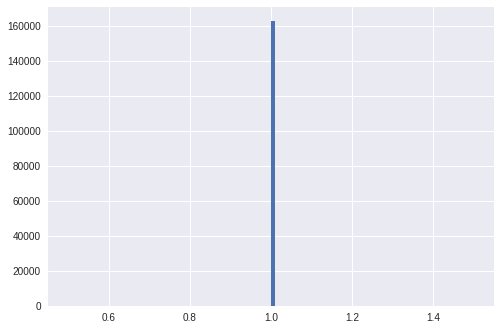

In [21]:
df.ratio = df.fundedamnt/df.loanamnt.astype(float,3)
df.ratio.hist(bins=100)
df[['fundedamnt', 'loanamnt']][0:10]

In [ ]:
#df = df.drop('funded_amnt', axis = 1)

#### instogram

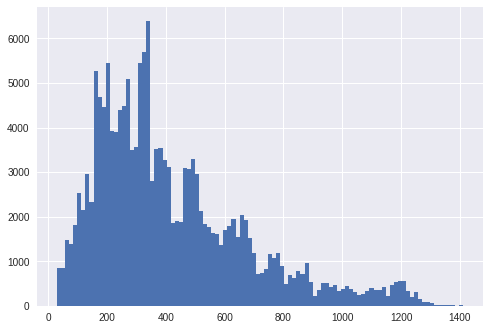

In [22]:
df.installment.hist(bins=100)

#### Mean response

In [23]:
df = df.query("loanstatus == 'Fully Paid' or loanstatus == 'Charged Off'")

In [24]:
df.shape

(145650, 95)

In [26]:
df['loanstatus'] = df.loanstatus.map({"Charged Off": 1, "Fully Paid": 0})

In [27]:
df.shape

(145650, 95)

In [ ]:
#delinq2yrs, openacc

In [28]:
dummy_list = ['emplength', 'verificationstatus', 'delinq2yrs', 'addrstate', 'homeownership', 'grade', 'subgrade', 'openacc']
n = len(dummy_list)

In [ ]:
# why verified incomes gives higher default rates?

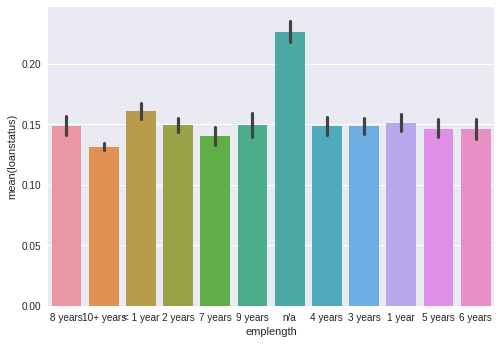

In [30]:
sns.barplot(x=dummy_list[0], y='loanstatus', data=df)

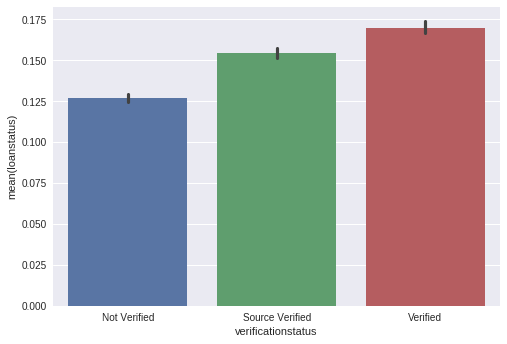

In [31]:
sns.barplot(x=dummy_list[1], y='loanstatus', data=df)

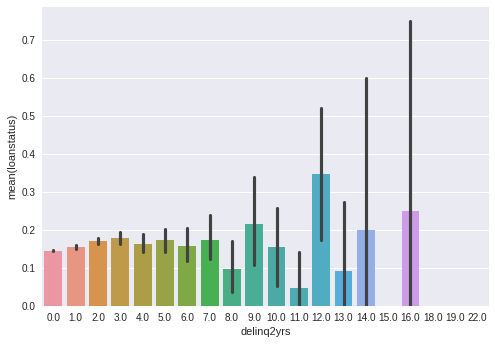

In [32]:
sns.barplot(x=dummy_list[2], y='loanstatus', data=df)

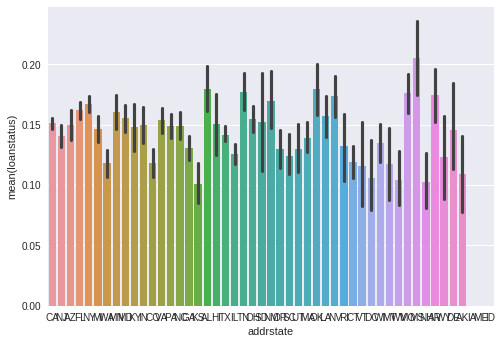

In [33]:
sns.barplot(x=dummy_list[3], y='loanstatus', data=df)

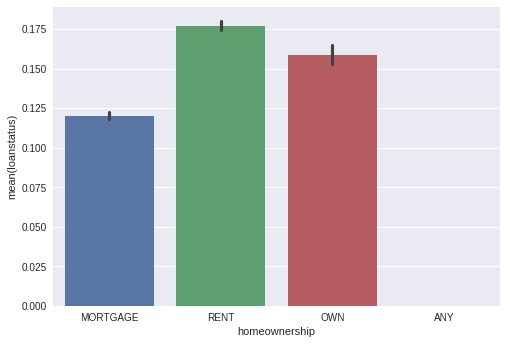

In [34]:
sns.barplot(x=dummy_list[4], y='loanstatus', data=df)

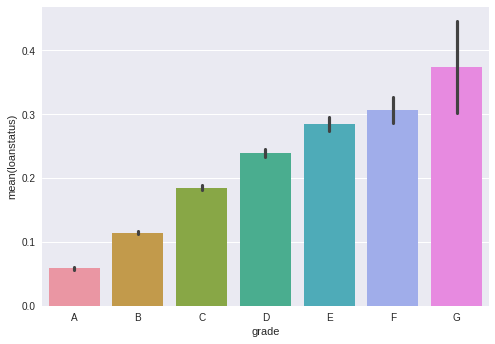

In [35]:
sns.barplot(x=dummy_list[5], y='loanstatus', data=df, order = np.sort(df.grade.unique()))

In [37]:
np.sort(df.subgrade.unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

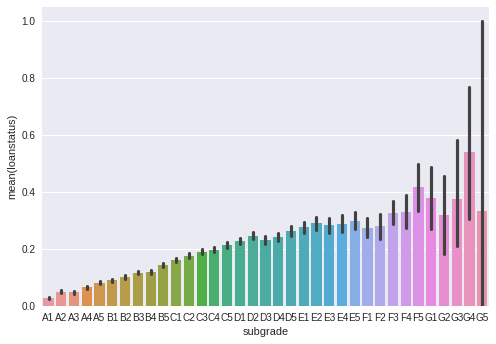

In [38]:
sns.barplot(x=dummy_list[6], y='loanstatus', data=df, order = np.sort(df.subgrade.unique()))

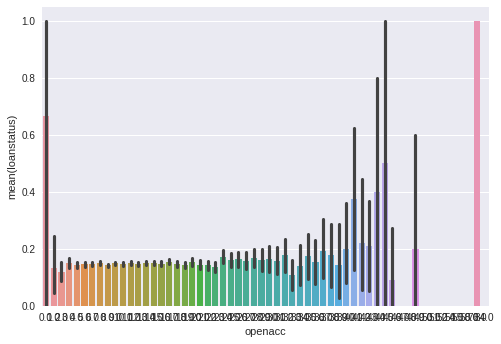

In [39]:
sns.barplot(x=dummy_list[7], y='loanstatus', data=df)

In [44]:
def continuous_variable_plot(feat_name):
    sns.set_style("whitegrid", {'axes.edgecolor': '0'})
    factor = pd.qcut(df[feat_name], 5, labels = False)
    table = df.groupby([factor, 'loanstatus']).size()
    table = table.unstack('loanstatus')
    normedtable = table.div(table.sum(1), axis = 0)
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    normedtable.iloc[:,1].plot(kind = 'bar', alpha=0.9, color = '#FD2C10', ax = ax)
    ax.set_xlabel("%s percentile" % feat_name, fontsize = 20)
    ax.set_ylabel('Default Rate', fontsize = 20)
    x = range(5)
    labels = ['20%tile', '40%tile', '60%tile', '100%tile']
    plt.xticks(x,labels, rotation='0', fontsize = 10)
    sns.despine()
    ax.set_title("Loan Performance with respect to %s" % feat_name)
    #fig.savefig('../output/age.jpg')

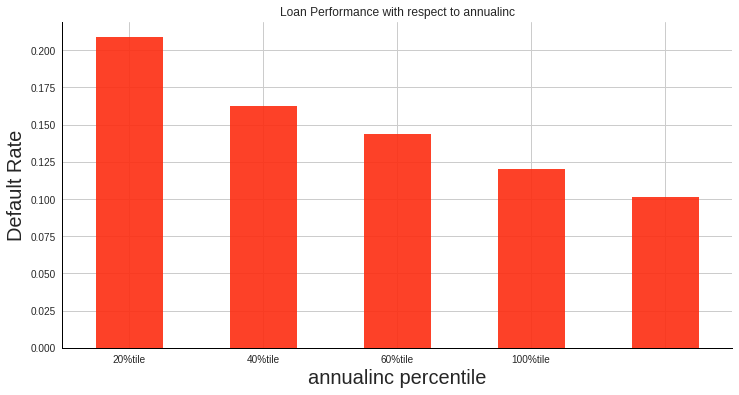

In [45]:
continuous_variable_plot('annualinc')

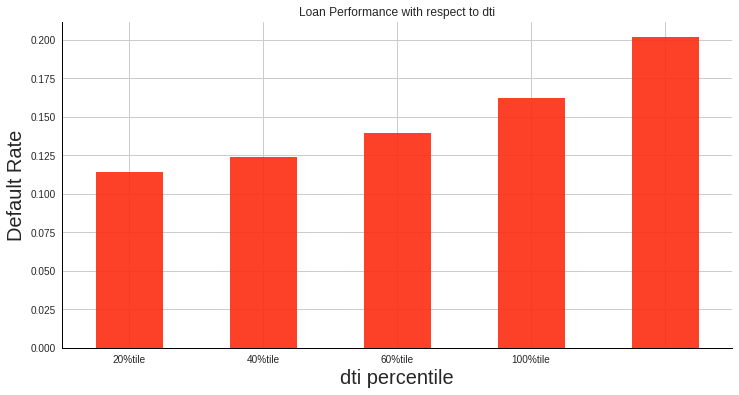

In [46]:
continuous_variable_plot('dti')

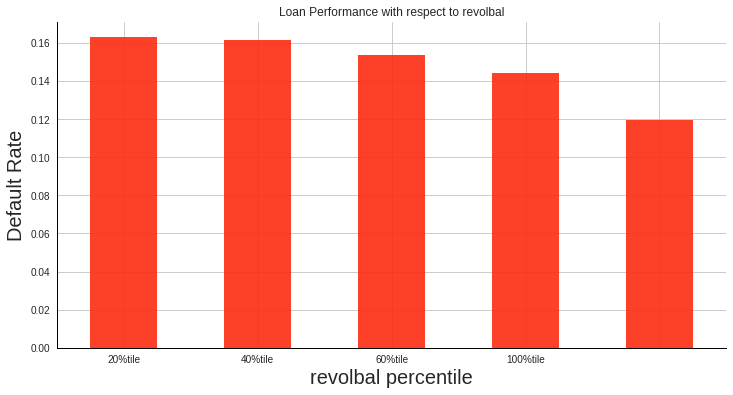

In [48]:
continuous_variable_plot('revolbal')

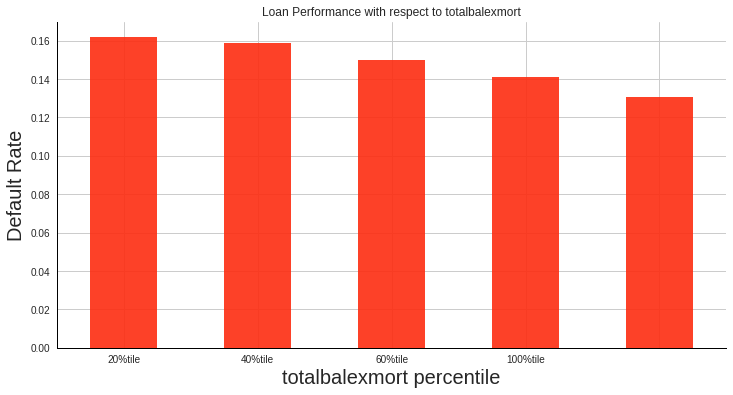

In [49]:
continuous_variable_plot('totalbalexmort')

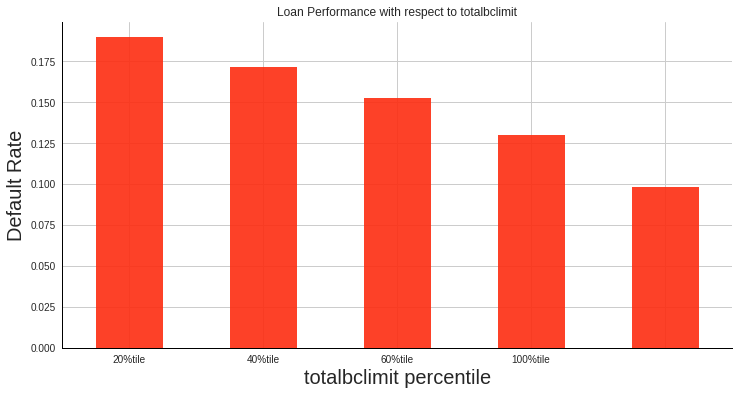

In [50]:
continuous_variable_plot('totalbclimit')

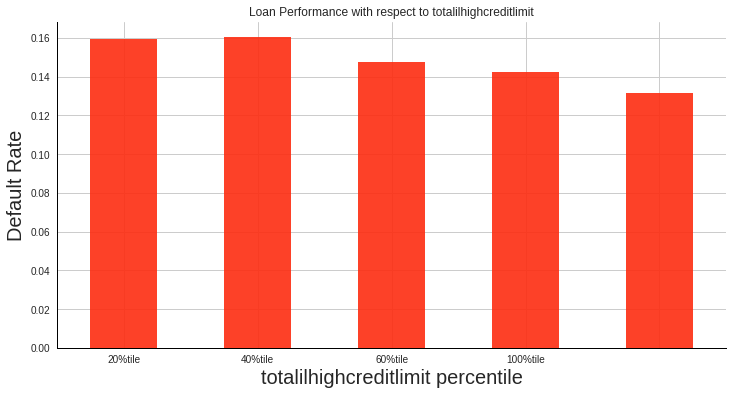

In [51]:
continuous_variable_plot('totalilhighcreditlimit')

### Save Model

In [ ]:
import pickle

In [ ]:
pickle.dump(gbm, open('model.pkl', "wb"))

In [ ]:
from sklearn.externals import joblib
joblib.dump(gbm, "pima.joblib.dat")

In [ ]:
with open('model.pkl', 'w') as outfile:
    pickle.dump(gbm, outfile)

### with open() as

In [ ]:
with open('current_list.txt', 'w') as outfile:
    json.dump(myData, outfile)

In [ ]:
df_current = pd.read_json('current_list.txt')

In [ ]:
# why we only get few loans through api, but there are much more listed on the lending club website?
# -- might because API only gives you the data from the latest update.
df_current.tail()

In [ ]:
# A better way to read a json file(can read json to dato frame with more complex structure)
df_current = pd.io.json.json_normalize(myData)

In [ ]:
df_current.tail()